<a href="https://colab.research.google.com/github/Blazingphoenix-181/Dog-breed-classifier/blob/main/dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tensorflow pandas scikit-learn matplotlib opencv-python


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
labels_df = pd.read_csv('/content/drive/MyDrive/dog-breed-identification/labels.csv')
labels_df.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:

IMG_SIZE = 224
DATASET_PATH = "/content/drive/MyDrive/dog-breed-identification/train"
NUM_IMAGES = 1000


X, y = [], []

for idx, row in labels_df[:NUM_IMAGES].iterrows():
    img_path = os.path.join(DATASET_PATH, row['id'] + '.jpg')
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(row['breed'])

X = np.array(X, dtype='float32') / 255.0


In [ ]:

lb = LabelBinarizer()
y = lb.fit_transform(y)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(len(lb.classes_), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.0361 - loss: 4.8652 - val_accuracy: 0.0641 - val_loss: 4.6166
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2980 - loss: 3.6255 - val_accuracy: 0.1538 - val_loss: 4.3727
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5353 - loss: 2.7791 - val_accuracy: 0.1923 - val_loss: 4.1318
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6716 - loss: 1.9060 - val_accuracy: 0.2308 - val_loss: 3.8514
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8076 - loss: 1.2231 - val_accuracy: 0.2436 - val_loss: 3.7257
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8873 - loss: 0.7334 - val_accuracy: 0.2821 - val_loss: 3.5411
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9631 - loss: 0.4634 - val_accuracy: 0.3077 - val_loss: 3.4684
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9715 - loss: 0.3194 - val_accuracy: 0.2564 - val_loss:

In [ ]:
def predict_breed(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    breed = lb.classes_[np.argmax(pred)]
    print(f"✅ Predicted Breed: {breed}")
    return breed



In [ ]:

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    predict_breed(fn)



Saving ffa76e07dc686174c2a55fdbdca68bb3.jpg to ffa76e07dc686174c2a55fdbdca68bb3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
✅ Predicted Breed: welsh_springer_spaniel


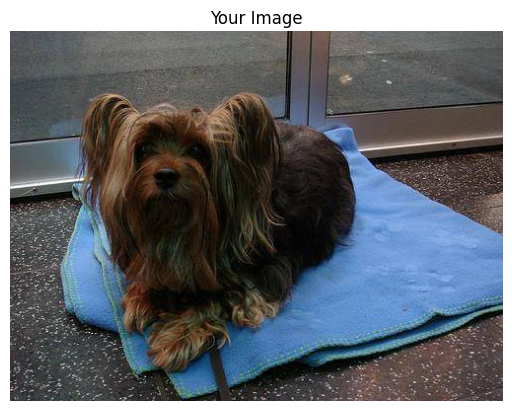

In [ ]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/content/ff9742bc22b5830176e85490cf54cdf7.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.title('Your Image')
plt.show()


In [ ]:
img= predict_breed(fn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
✅ Predicted Breed: welsh_springer_spaniel
